In [1]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFunctions import * 
from random import uniform
import random
import pickle
import math
import time
%matplotlib inline
import os
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.optimize import curve_fit

In [2]:
def nearest(array, value1,value2):
    array = np.asarray(array)
    idx1 = (np.abs(array - value1)).argmin()
    idx2 = (np.abs(array - value2)).argmin()
    #return array[idx1],array[idx2],idx1,idx2
    return idx1, idx2

In [3]:
Dir1 = os.listdir('1/')
SimDir = []
for i in range(len(Dir1)):
    if Dir1[i][-3:]=='pkl':
        SimDir.append(Dir1[i])
        #print(Dir1[i][-6:-4])
        
Dir2 = os.listdir('/Users/Lab/Desktop/data_for_mira/144GHz/')
ExpDir = []
for i in range(len(Dir2)):
    if Dir2[i][-3:]=='pkl':
        ExpDir.append(Dir2[i])
        #print(Dir2[i][-6:-4])
        
#checking for duplicates
#for i in range(len(ExpDir)):
    #for j in range(len(ExpDir)):
        #if i !=j:
            #if ExpDir[i][-6:-4]==ExpDir[j][-6:-4]:
                #print(ExpDir[i][-6:-4])

In [4]:
def MakeContoursSim(name): # to get x and y and z of source point grid
    with open('Delay/Delay_Chamb_144_Narrow_20_y-103.0_2.07mm_2019_08_18_09_03_28_04.pkl','rb') as F:
        Delay2 = pickle.load(F) #same for all simulations
    with open('1/'+name,'rb') as F:
        Ij2 = pickle.load(F)
    SimNormFactor = 50852.3473551
    Lamd =2.089
    Nsize = Nsized(Lamd)
    xtot = 36*0.95630475596*4 #total length of the scan
    df = 1/xtot
    f = df*np.arange(1+Nsize/2)-df/2

    d2 = Ij2
    D2 = np.hanning(int(np.shape(d2)[0]))*d2
    S2 = np.fft.rfft(D2)
    u2 = np.abs(S2)
    # AC coupling
    A = 300*f[:]
    B = u2
    for i in range(len(A)):
        if A[i]<=30:
            B[i]=0
    ifX1 = np.fft.fftshift(np.fft.irfft(B-np.mean(B))) #with mean of B subtracted
    y = int(name[-6])#4 - int(name[-6]))# in mira coordinates
    x = int(name[-5])#(int(name[-5])-4) #in mira coordinates
    z = max(ifX1)/SimNormFactor
    return x,y,z
def MakeContoursExp(name):
    with open('Delay/Delay_Chamb_144_Narrow_20_y-103.0_2.07mm_2019_08_18_09_03_28_04.pkl','rb') as F:
        Delay2 = pickle.load(F) #same for all simulations as reference
    with open('/Users/Lab/Desktop/data_for_mira/144GHz/'+name,'rb',) as F:
        Z = pickle.load(F,encoding='latin1')  
    ExpNormFactor = 1.30118171724
    IjZ1 = Z['sig0F']
    IjZ = np.hanning(int(np.shape(IjZ1)[0]))*IjZ1
    DelayZ = Z['delay0F']
    idx1,idx2 = nearest(DelayZ,Delay2[0],Delay2[-1])# match delay value range from Zhaodi pickle files
    y = int(name[-6])#(4 - int(name[-6]))# in mira coordinates
    x = int(name[-5])#(int(name[-5])-4) #in mira coordinates
    z = (max(IjZ[idx1:idx2])/ExpNormFactor)
    return x,y,z

In [5]:
Xs = []
Ys = []
Zs = []
Xe = []
Ye = []
Ze = []
for i in range(81):
    xe,ye,ze = MakeContoursExp(ExpDir[i])
    Xe.append((xe-4)*2.5),Ye.append((4-ye)*2.5), Ze.append(ze)
    xs,ys,zs = MakeContoursSim(SimDir[i])
    Xs.append((xs-4)*2.5),Ys.append((4-ys)*2.5),Zs.append(zs)

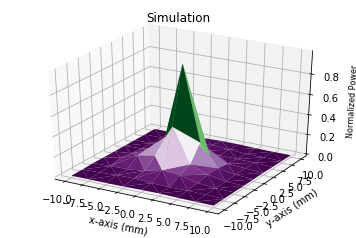

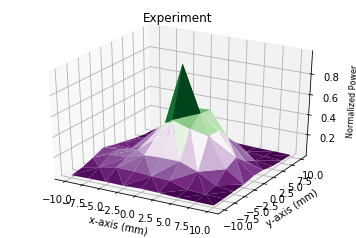

In [6]:
pl3d = pl.figure().gca(projection = '3d')
#Xs,Ys = np.meshgrid(Xs,Ys)
pl3d.set_title('Simulation')
pl3d.plot_trisurf(Xs,Ys,Zs, linewidth = .2, antialiased=True,cmap="PRGn",label = 'Normalized Total Power')

pl3d.set_xlabel('x-axis (mm)')
pl3d.set_ylabel('y-axis (mm)')
pl3d.set_zlabel('Normalized Power',fontsize=8)
pl.show()

pl3d = pl.figure().gca(projection = '3d')
pl3d.set_title('Experiment')
pl3d.plot_trisurf(Xe,Ye,Ze, linewidth = .2, antialiased=True,cmap="PRGn",label = 'Normalized Total Power')
pl3d.set_xlabel('x-axis (mm)')
pl3d.set_ylabel('y-axis (mm)')
pl3d.set_zlabel('Normalized Power',fontsize=8)
pl.show()

In [7]:
# for contour maps
Xs = [[0 for x in range(9)] for y in range(9)] 
Ys = [[0 for x in range(9)] for y in range(9)] 
Zs = [[0 for x in range(9)] for y in range(9)] 
Xe = [[0 for x in range(9)] for y in range(9)] 
Ye = [[0 for x in range(9)] for y in range(9)] 
Ze = [[0 for x in range(9)] for y in range(9)] 
for i in range(81):
    xe,ye,ze = MakeContoursExp(ExpDir[i])
    Xe[ye][xe]=(xe-4)*2.5
    Ye[ye][xe]=(4-ye)*2.5
    Ze[ye][xe]=ze
    xs,ys,zs = MakeContoursSim(SimDir[i])
    Xs[ys][xs]=(xs-4)*2.5
    Ys[ys][xs]=(4-ys)*2.5
    Zs[ys][xs]=zs

NameError: name 'im1' is not defined

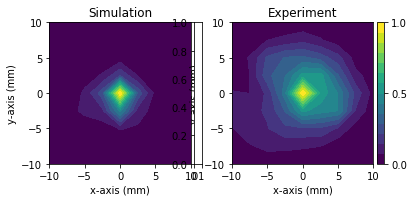

In [8]:
import matplotlib.colors as mc
from mpl_toolkits.axes_grid1 import make_axes_locatable

cbar_min = np.min(Ze)
cbar_max = np.max(Ze)
cbarlabels = np.linspace(np.floor(cbar_min), np.ceil(cbar_max), num=5, endpoint=True)
levels = np.linspace(np.floor(cbar_min), np.ceil(cbar_max), 15) # to draw 35 levels
norm = mc.BoundaryNorm(levels, 256)

fig,(ax1,ax2)=pl.subplots(1,2)

ax2.set_title('Experiment')
im2 = ax2.contourf(Xe,Ye,Ze,levels=levels, norm=norm)
ax2.set(adjustable='box-forced', aspect='equal')
ax2.set_xlabel('x-axis (mm)')
ax2.set_ylabel('y-axis (mm)')
#pl.colorbar(a1,ax=ax1)
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im2, cax=cax, orientation='vertical',ticks = [0,.5,1])
#fig.colorbar(a1)
#pl.show()

ax1.set_title('Simulation')
a1 = ax1.contourf(Xs,Ys,Zs,levels=levels, norm=norm)
ax1.set(adjustable='box-forced', aspect='equal')
ax1.set_xlabel('x-axis (mm)')
ax1.set_ylabel('y-axis (mm)')
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical',ticks = [0,.5,1])
#fig.colorbar(a2)
pl.tight_layout()
#pl.savefig('/Users/Lab/Desktop/Comparison/Contour.png',dpi=800)
pl.show()


In [9]:
# for pixelated pcolormesh maps
Xs = [[0 for x in range(9)] for y in range(9)] 
Ys = [[0 for x in range(9)] for y in range(9)] 
Zs = [[0 for x in range(9)] for y in range(9)] 
Xe = [[0 for x in range(9)] for y in range(9)] 
Ye = [[0 for x in range(9)] for y in range(9)] 
Ze = [[0 for x in range(9)] for y in range(9)] 
for i in range(81):
    xe,ye,ze = MakeContoursExp(ExpDir[i])
    Xe[ye][xe]=(xe-4)*2.5-(2.5/2)
    Ye[ye][xe]=(4-ye)*2.5+(2.5/2)
    Ze[ye][xe]=ze
    xs,ys,zs = MakeContoursSim(SimDir[i])
    Xs[ys][xs]=(xs-4)*2.5-(2.5/2)
    Ys[ys][xs]=(4-ys)*2.5+(2.5/2)
    Zs[ys][xs]=zs
for i in range(9):
    Xs[i].append(Xs[i][8]+2.5)
    Xe[i].append(Xs[i][8]+2.5)
    Ys[i].append(Ys[i][0])
    Ye[i].append(Ye[i][0])
Xs.append(Xs[0])
Xe.append(Xe[0])
Ys.append([Ys[i][0]-2.5,Ys[i][0]-2.5,Ys[i][0]-2.5,Ys[i][0]-2.5,Ys[i][0]-2.5,Ys[i][0]-2.5,Ys[i][0]-2.5,Ys[i][0]-2.5,Ys[i][0]-2.5,Ys[i][0]-2.5 ])
Ye.append([Ys[i][0]-2.5,Ys[i][0]-2.5,Ys[i][0]-2.5,Ys[i][0]-2.5,Ys[i][0]-2.5,Ys[i][0]-2.5,Ys[i][0]-2.5,Ys[i][0]-2.5,Ys[i][0]-2.5,Ys[i][0]-2.5 ])


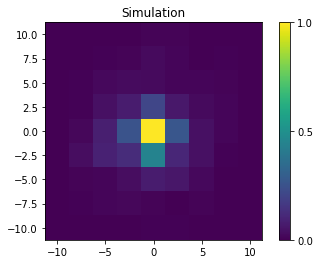

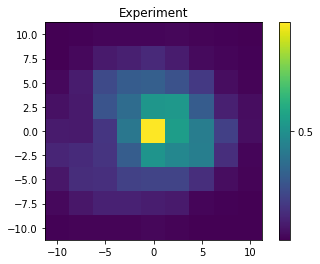

In [10]:
#pl.contourf(Xs,Ys,Zs,levels=levels, norm=norm)
pl.pcolormesh(Xs,Ys,Zs)#,levels=levels, norm=norm)
pl.title('Simulation')
#pl.xlabel('x-axis (mm)')
#pl.ylabel('y-axis (mm)')
pl.colorbar(ticks=[0,.5,1])
#pl.axis('equal')#adjustable='box-forced', aspect='equal')
pl.gca().set_aspect('equal', adjustable='box')
pl.savefig('/Users/Lab/Desktop/Comparison/ContourSim.png',dpi=800)
pl.show()


#pl.contourf(Xe,Ye,Ze)#,levels=levels, norm=norm)
pl.pcolormesh(Xe,Ye,Ze)
pl.title('Experiment')
#pl.xlabel('x-axis (mm)')
#pl.ylabel('y-axis (mm)')
pl.colorbar(ticks=[0,.5,1])
#pl.axis('equal')#adjustable='box-forced', aspect='equal')
pl.gca().set_aspect('equal', adjustable='box')
pl.savefig('/Users/Lab/Desktop/Comparison/ContourExp.png',dpi=800)
pl.show()

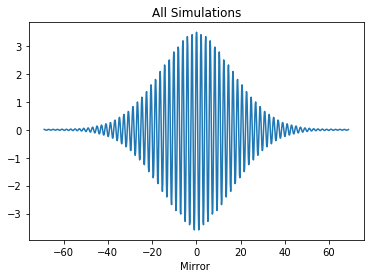

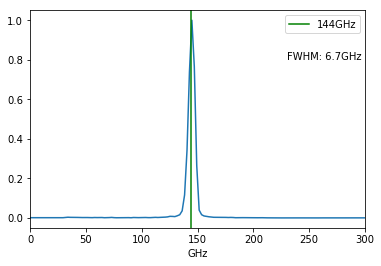

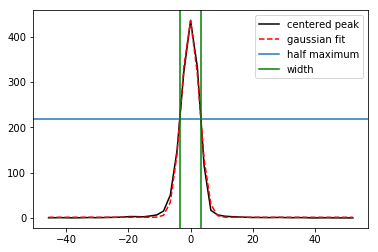

FWHM= 6.6814561886


In [28]:
# now summing up all and comparing. 
Int = np.array([])
with open('Delay/Delay_Chamb_144_Narrow_20_y-103.0_2.07mm_2019_08_18_09_03_28_04.pkl','rb') as F:
    Delay2 = pickle.load(F)
Lamd =2.089
Nsize = Nsized(Lamd)
xtot = 36*0.95630475596*4 #total length of the scan
df = 1/xtot
f = df*np.arange(1+Nsize/2)-df/2
for j in range(len(SimDir)):
    with open('1/'+SimDir[j],'rb') as F:
        Ij2 = pickle.load(F)
    d2 = Ij2
    D2 = np.hanning(int(np.shape(d2)[0]))*d2
    S2 = np.fft.rfft(D2)
    u2 = np.abs(S2)
    A = 300*f[:]
    B = u2
    for i in range(len(A)):
        if A[i]<=30:
            B[i]=0
    ifX1 = np.fft.fftshift(np.fft.irfft(B-np.mean(B))) #with mean of B subtracted
    ifX = ifX1
    ifX[415]=max(ifX1) #just set to max of entire interferogram
    ij = np.array(ifX)/50852.3473551 #normalize
    if j ==0:
        Int=ij
    else:
        Int = Int+ij
pl.title('All Simulations')
pl.plot(Delay2,Int)
pl.xlabel('Mirror ')
#pl.savefig('/Users/Lab/Desktop/Comparison/AllSimInt.png',dpi=300)

pl.show()

# converting back to fourier space
S = np.fft.rfft(Int)
#S = S[1:]
u = np.abs(S)
#pl.title('All Simulations Spectrum')
pl.plot(300*f,u/max(u))
pl.axvline(x =144, color = 'green', label = str(144)+'GHz')
pl.legend()
pl.xlim(0,300)
pl.xlabel('GHz')
pl.text(230,.8,'FWHM: 6.7GHz',fontsize=10)
pl.savefig('/Users/Lab/Desktop/Comparison/AllSimSpec.png',dpi=300)
pl.show()

# trying to get full width half maximum
def gauss(x, m,u,a,b): # p[0]==mean, p[1]==stdev
    return b+a*np.exp(-(x-m)**2/(2*u**2))
f300=300*f
f1,f2 = nearest(f300,100,200) # range of gaussian curve fit to be used
f300centered = [f300[i]-f300[np.argmax(u)] for i in range(len(f300))] # should shift to center

popt, pcov = curve_fit(gauss, f300centered[f1:f2], u[f1:f2])
pl.plot(f300centered[f1:f2],u[f1:f2],color='k',label = 'centered peak')
pl.plot(f300centered[f1:f2],gauss(f300centered[f1:f2],popt[0],popt[1],popt[2],popt[3]),linestyle = '--',color='red',label='gaussian fit')
pl.axhline(max(u[f1:f2])/2,label = 'half maximum')
pl.axvline(-3.35,label = 'width',color = 'green')
pl.axvline(3.35,color = 'green')
pl.legend()
pl.show()
#print(popt)

FWHM = 2*np.sqrt(2*np.log(2))*(popt[1])
print('FWHM=',FWHM)
# YAY


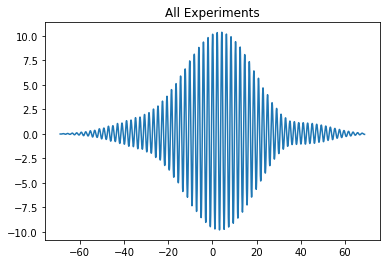

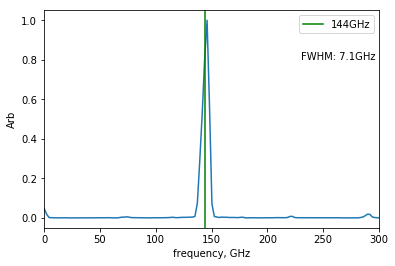

FWHM= 7.08684065741


In [422]:
# now summing up all and comparing. 
IntE = np.array([])
for j in range(len(ExpDir)):
    with open('/Users/Lab/Desktop/data_for_mira/144GHz/'+ExpDir[j],'rb',) as F:
        Z = pickle.load(F,encoding='latin1') 
    IjZ1 = Z['sig0F']
    #a = signal.tukey(len(Z['sig0F']), alpha = 0.1) #(you could also try 0.2 here))
    IjZ = np.hanning(int(np.shape(IjZ1)[0]))*IjZ1
    DelayZ = Z['delay0F']
    ij = np.array(IjZ)/1.30118171724 #normalize
    if j ==0:
        IntE=ij
    else:
        IntE = IntE+ij
idx1,idx2 = nearest(DelayZ,Delay2[0],Delay2[-1])# match delay value range from Zhaodi pickle files

pl.title('All Experiments')
pl.plot(DelayZ[idx1:idx2],IntE[idx1:idx2])
#pl.savefig('/Users/Lab/Desktop/Comparison/AllExpInt.png',dpi=300)
pl.show()



with open('/Users/Lab/Desktop/data_for_mira/144GHz/'+ExpDir[0],'rb',) as F:
        d = pickle.load(F,encoding='latin1') 
# tryin to get x-axis in GHz HALP

#i = 8
Nsize = idx2-idx1
dt=(1/(d['sample freq']))
t=dt*np.arange(Nsize)
v=(d['speed'])
x = v*t
dx = dt*v
total_t = (d['scan time'])
    
total_s = (d['samples requested'])
startpt = int((total_s - Nsize)/2) 
endpt = int(startpt + Nsize)
    
F = IntE[idx1:idx2]
S = np.fft.rfft(F)
    
S = S[:-1]
u = np.abs(S)
dNu = 1/(Nsize*dx)
Nu = dNu*np.arange(Nsize/2)

pl.plot()
pl.plot (300*Nu,np.abs(S)/max(np.abs(S)))
#pl.title('All Experiments Spectrum')
pl.xlabel ("frequency, GHz")
pl.ylabel ('Arb')
pl.xlim(0,300)
pl.axvline(x =144, color = 'green', label = str(144)+'GHz')
pl.text(230,.8,'FWHM: 7.1GHz',fontsize=10)

pl.legend()
pl.savefig('/Users/Lab/Desktop/Comparison/AllExpSpec.png',dpi=300)

pl.show()

# getting FWHM
f300=300*Nu
f1,f2 = nearest(f300,100,200) # range of gaussian curve fit to be used
f300centered = [f300[i]-f300[np.argmax(u)] for i in range(len(f300))] # should shift to center

popt, pcov = curve_fit(gauss, f300centered[f1:f2], u[f1:f2])
#pl.plot(f300centered[f1:f2],u[f1:f2])
#pl.plot(f300centered[f1:f2],gauss(f300centered[f1:f2],popt[0],popt[1],popt[2],popt[3]))
#pl.show()
#print(popt)

FWHM = 2*np.sqrt(2*np.log(2))*(popt[1])
print('FWHM=',FWHM)

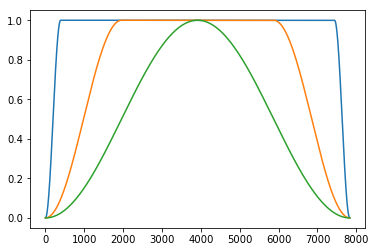

In [390]:
a = signal.tukey(len(Z['sig0F']), alpha = 0.1) #(you could also try 0.2 here))
b = signal.tukey(len(Z['sig0F']), alpha = 0.5) #(you could also try 0.2 here))
c = np.hanning(int(np.shape(IjZ1)[0]))
pl.plot(a)
pl.plot(b)
pl.plot(c)
pl.show()

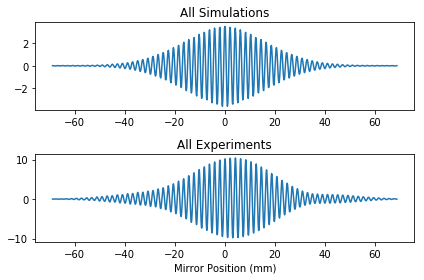

In [334]:
fig,(ax1,ax2)=pl.subplots(2, 1)# sharex=True)
ax1.set_title('All Simulations')
ax1.plot(Delay2,Int)#,label = 'AC Simulated\nand Apodized')
#ax1.set_xlabel('Mirror Position (mm)')
#ax1.set_aspect((max(Delay2)-min(Delay2)/(limB+limB)))
#ax1.legend()
#pl.savefig('/Users/Lab/Desktop/sim1.png',dpi=300)

#pl.figure()
#pl.title(str(44)+' Experimental')
ax2.set_title('All Experiments')
ax2.plot(DelayZ[idx1:idx2],IntE[idx1:idx2])#,label = 'AC coupled\nand Apodized')
ax2.set_xlabel('Mirror Position (mm)')
#ax2.set_ylim(-limB,limB)
#ax2.set_aspect((max(Delay2)-min(Delay2)/(limB+limB)))
#ax2.legend()
pl.tight_layout()
pl.savefig('/Users/Lab/Desktop/SummedComparison1.png',dpi=500)
pl.show()



In [374]:
from scipy import signal
a = signal.tukey(len(d['sig0F']), alpha = 0.1) #(you could also try 0.2 here))

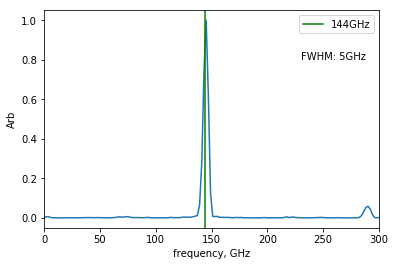

FWHM= 5.20313100687


In [376]:
with open('/Users/Lab/Desktop/data_for_mira/144GHz/20180318_2155_150GHz_new_polarizer_44.pkl','rb',) as F:
        d = pickle.load(F,encoding='latin1') 
# tryin to get x-axis in GHz HALP

#i = 8
Nsize = len(d['sig0F'])#idx2-idx1
dt=(1/(d['sample freq']))
t=dt*np.arange(Nsize)
v=(d['speed'])
x = v*t
dx = dt*v
total_t = (d['scan time'])
    
total_s = (d['samples requested'])
startpt = int((total_s - Nsize)/2) 
endpt = int(startpt + Nsize)

A = d['sig0F']
F = np.hanning(int(np.shape(A)[0]))*A
S = np.fft.rfft(F)
    
S = S[:-1]
u = np.abs(S)
dNu = 1/(Nsize*dx)
Nu = dNu*np.arange(Nsize/2)

pl.plot()
pl.plot (300*Nu,np.abs(S)/max(np.abs(S)))
#pl.title('All Experiments Spectrum')
pl.xlabel ("frequency, GHz")
pl.ylabel ('Arb')
pl.xlim(0,300)
pl.axvline(x =144, color = 'green', label = str(144)+'GHz')
pl.text(230,.8,'FWHM: 5GHz',fontsize=10)

pl.legend()
#pl.savefig('/Users/Lab/Desktop/Comparison/AllExpSpec.png',dpi=300)

pl.show()

# getting FWHM
f300=300*Nu
f1,f2 = nearest(f300,100,200) # range of gaussian curve fit to be used
f300centered = [f300[i]-f300[np.argmax(u)] for i in range(len(f300))] # should shift to center

popt, pcov = curve_fit(gauss, f300centered[f1:f2], u[f1:f2])
#pl.plot(f300centered[f1:f2],u[f1:f2])
#pl.plot(f300centered[f1:f2],gauss(f300centered[f1:f2],popt[0],popt[1],popt[2],popt[3]))
#pl.show()
#print(popt)

FWHM = 2*np.sqrt(2*np.log(2))*(popt[1])
print('FWHM=',FWHM)

# beam loss 
with open('500Rays_Narrow_20__2019_08_24_13_41_38.pkl','rb') as F:
    Rays1 = pickle.load(F)
    
#Runs n rays from radius r and collects the number of rays that hit the detector (Ij) at
#the certain mirror position (Delay) and saves the rays (OR)
def RunSourceModulating_narrow(Rays): 
    #thetG = [0,0,0]
    #spo = [-160.375,-113.,-80.0] #global CENTERED
    #Rays = makerays_Zero_narrow(spo,thetG,r,n) #sourcethet as [0,0,0]
    Nsize=500
    Ij = []
    Delay = []
    OR = [[] for i in range(Nsize)]
    j = 0
    for y in np.linspace(-18,18,int(Nsize)):
        PTot=0
        OutRays=RunRaysM(Rays,y) #eight each
        Delay.append(y*0.95630475596*4)
        Ij.append(len(OutRays)) #is just number (dont need Lamd)
        OR[j].append(OutRays)
        j = j+1
    return Delay,Ij,OR

Timei = time.time()
Freq = 144.3
Lamd = 300/Freq 
Nsize = Nsized(Lamd)
sourcethet = [0.,0.,0.] 
n = 500
r = 0
thetmirr = [.0,0.0,0.0] 
thetpolarz = [[0,0,0],[0,0,0],[0,0,0],[0,0,0]] 
Delay,Ij,ORays = RunSourceModulating_narrow(Rays1) 
Timef = time.time()
print('total time: ~',float(Timef-Timei)/60, 'mins')
pl.plot(Delay,Ij,linewidth = .8)
#pl.tick_params(colors = 'white')
#pl.title('$\lambda$='+str(Lamd),color = 'black')
pl.xlabel('Optical Delay (mm)', color = 'black')
pl.show()

with open('Geom_Mod'+time.strftime("_%Y_%m_%d_%H_%M_%S") + "44_envelope.pkl", "wb") as F:
    pickle.dump(Ij,F)
with open("Geom_Delayn"+time.strftime("_%Y_%m_%d_%H_%M_%S") + "44_envelope.pkl", "wb") as F:
    pickle.dump(Delay,F)

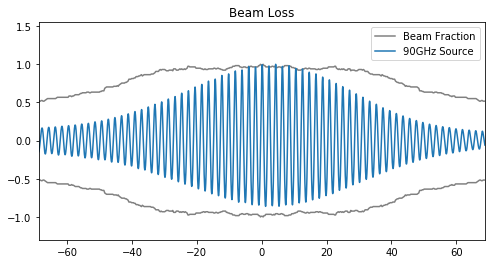

In [457]:
#with open('Delay/Delay_Chamb_144_Narrow_20_y-103.0_2.07mm_2019_08_18_09_03_28_04.pkl','rb') as F:
    #Delay2 = pickle.load(F)
#with open('1/Ij_Chamb_144_Narrow_20_x-160.375_2.07mm_2019_08_15_22_57_10_44.pkl','rb') as F:
    #Ij2 = pickle.load(F)
    
with open('Geom_Delayn_2019_09_06_18_33_5844_envelope.pkl','rb') as F:
    Delay = pickle.load(F)
with open('Geom_Mod_2019_09_06_18_33_5844_envelope.pkl','rb') as F:
    Ij = pickle.load(F)
    
#with open( '../MultiRaySimulation/IjModulate_2018_07_14_09_17_39.pkl' , 'rb') as file1:
    #Ij=pickle.load(file1, encoding = 'latin1')
#with open( '../MultiRaySimulation/DelayModulate_2018_07_14_09_17_39.pkl' , 'rb') as file1:
    #Delay=pickle.load(file1, encoding = 'latin1')
#with open('/Users/Lab/Desktop/data_for_mira/20180318_1539_90GHz_new_polarizer_44.pkl','rb',) as F:
    #Z = pickle.load(F,encoding='latin1')  
with open('/Users/Lab/Desktop/data_for_mira/144GHz/20180318_2155_150GHz_new_polarizer_44.pkl','rb',) as F:
    Z = pickle.load(F,encoding='latin1')  
    
IjZ = Z['sig0F']
DelayZ = Z['delay0F']

#idx1,idx2 = nearest(DelayZ,Delay2[0],Delay2[-1])
pl.figure(figsize=(8,4))
pl.title('Beam Loss')
pl.plot(Delay,np.array(Ij)/max(Ij),color='grey',label = 'Beam Fraction')
pl.plot(Delay,-np.array(Ij)/max(Ij),color='grey')
pl.plot(DelayZ[idx1:idx2],IjZ[idx1:idx2]/max(IjZ[idx1:idx2]),label = '90GHz Source')

pl.legend()
pl.ylim(-1.3,1.55)
pl.xlim(min(Delay),max(Delay))

#pl.savefig('/Users/Lab/Desktop/Comparison/BeamLoss90GHz.png',dpi=300)

pl.show()

